In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_frame=pd.read_csv("000001.csv")

In [3]:
data_frame.head()

,Date,Open,High,Low,Close,Turnover,Volume
0,1/5/2015,3258.63,3369.28,3253.88,3350.52,549760.13,53135238400
1,1/6/2015,3330.80,3394.22,3303.18,3351.45,532398.46,50166169600
2,1/7/2015,3326.65,3374.90,3312.21,3373.95,436416.70,39191888000
3,1/8/2015,3371.96,3381.57,3285.10,3293.46,399230.30,37113116800
4,1/9/2015,3276.97,3404.83,3267.51,3285.41,458648.00,41024086400


In [12]:
# ignore the first column of the data frame
after_change_data_frame = data_frame.iloc[:,1:]

In [28]:
# Normalize a data frame
# Feature scaling
df = after_change_data_frame.apply(lambda x: x/x.max(),axis=0)

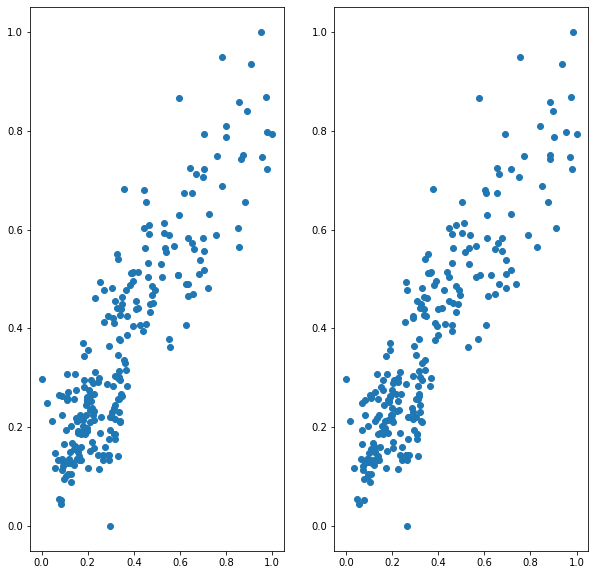

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].scatter(df["Low"],df["Turnover"])
ax[1].scatter(df["Close"],df["Turnover"])

In [39]:
size = [2104,1416, 1534, 852]
number_rooms = [5,3,3,2]
number_floors = [1,2,2,1]
area_home = [45,40,30,36]
price = [460,232,315,178]
data = []
data.append(size)
data.append(number_rooms)
data.append(number_floors)
data.append(area_home)
data.append(price)

In [37]:
data

[[2104, 1416, 1534, 852],
 [5, 3, 3, 2],
 [1, 2, 2, 1],
 [45, 40, 30, 36],
 [460, 232, 315, 178]]

In [41]:
df = pd.DataFrame(data)
df = df.transpose()
df.columns = ['size','number_rooms','number_floors','area_home','price']

In [42]:
df

,size,number_rooms,number_floors,area_home,price
0,2104,5,1,45,460
1,1416,3,2,40,232
2,1534,3,2,30,315
3,852,2,1,36,178


In [43]:
df['x_0'] = 1

In [44]:
df

,size,number_rooms,number_floors,area_home,price,x_0
0,2104,5,1,45,460,1
1,1416,3,2,40,232,1
2,1534,3,2,30,315,1
3,852,2,1,36,178,1


### Normal equation
m examples with n features

![comparason](figures\gradient_descent_normal_equation.PNG)

In [48]:
X = df[['size','number_rooms','number_floors','area_home','x_0']].values

In [60]:
X

array([[2104,    5,    1,   45,    1],
       [1416,    3,    2,   40,    1],
       [1534,    3,    2,   30,    1],
       [ 852,    2,    1,   36,    1]], dtype=int64)

In [61]:
X.transpose()

array([[2104, 1416, 1534,  852],
       [   5,    3,    3,    2],
       [   1,    2,    2,    1],
       [  45,   40,   30,   36],
       [   1,    1,    1,    1]], dtype=int64)

In [49]:
y = df['price']

In [58]:
# X^T*X
before_inverse = np.dot(X.transpose(),X)
# inverse of above
after_inverse = np.linalg.inv(before_inverse)
# multiply by transpose of X
theta = np.dot(np.dot(after_inverse,X.transpose()),y)

In [59]:
theta

array([   1.69067383, -715.6875    ,  100.21875   ,   -5.92919922,
        193.796875  ])